In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [43]:
#load dataset
data = sns.load_dataset("diamonds")

In [45]:
#number of rows and columnsa
print('Number of rows or data points:{},Number of columns or features:{}'.format(data.shape[0],data.shape[1]))

Number of rows or data points:53940,Number of columns or features:10


# Data Preprocessing

In [128]:
#number of columns with null values
for col in data.columns:
      if np.round(data[col].isnull().mean(),4)!=0:
       print('{} column has {} % null values'.format(col,np.round(data[col].isnull().mean(),4)))

### There are no null values in our dataset

In [139]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### There are data points in the dataset where x,y and z values are 0.0 which should not be possible so lets analyze these points

In [164]:
#points where x,y or z are zero
print('Percentage of data points with x,y or z=0 are {}'.format((len(data[(data['x']==0)|(data['y']==0)|(data['z']==0)])*100/len(data))))

Percentage of data points with x,y or z=0 are 0.03707823507601038


### Since it comprises of a very small proportion of the dataset we will proceed wit removing these values

In [175]:
# removing the values
data=data[~((data['x']==0)|(data['y']==0)|(data['z']==0))]

# Exploratory Data Analysis

In [184]:
#seperating the numerical and categorical columns
numerical_columns=[feature for feature in data.columns if data[feature].dtypes!='category']
categorical_columns=[feature for feature in data.columns if data[feature].dtypes=='category']

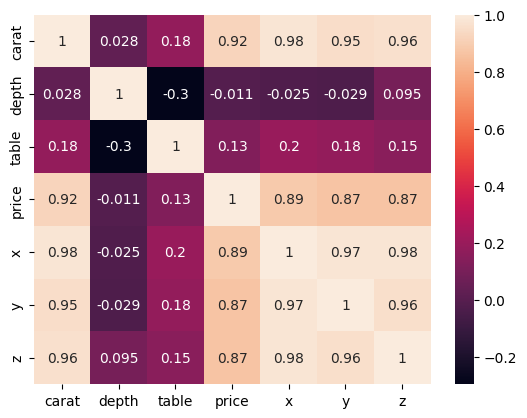

In [200]:
#correlation for numerical columns
sns.heatmap(data[numerical_columns].corr(),annot=True)
plt.show()

### Insights

1. Price has a very strong correlation with the dimensions x,y and z.
2. Price show the strongest correlation with carat.It increases heavily with increase in carat weight.
3. Features such as depth and table have weak/very weak correlations with price and hence does not influence price that much.

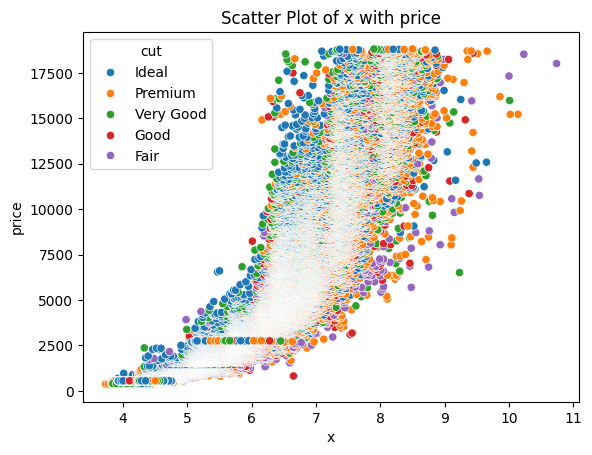

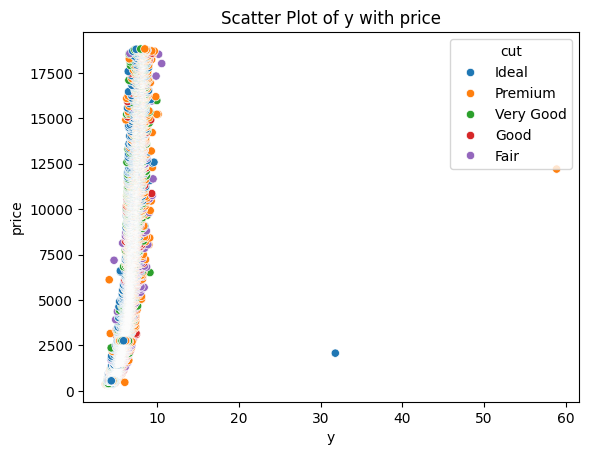

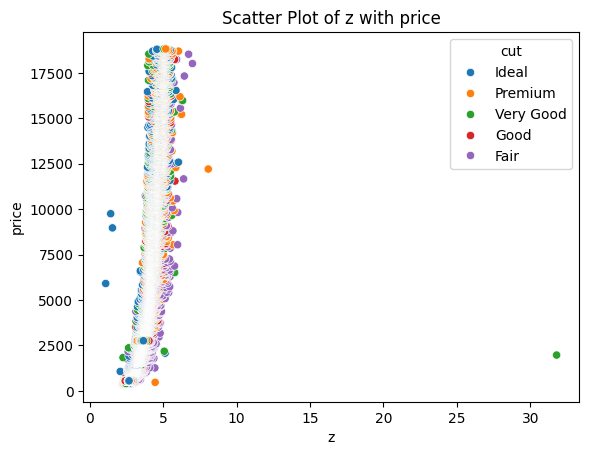

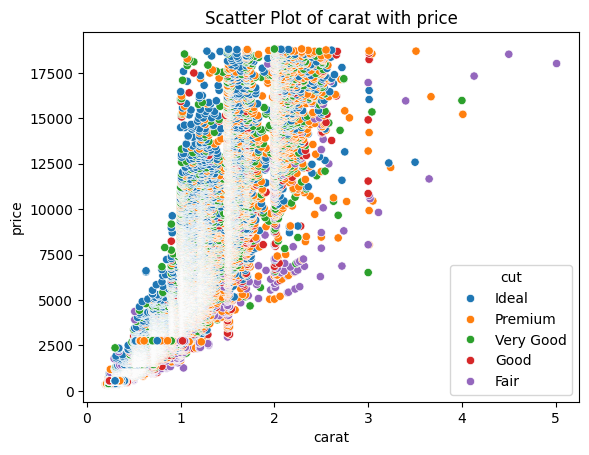

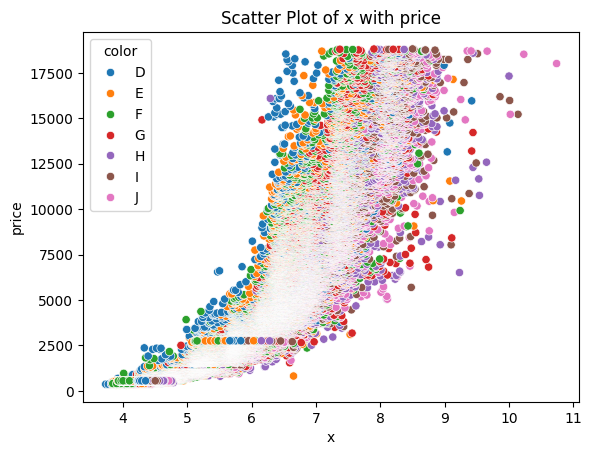

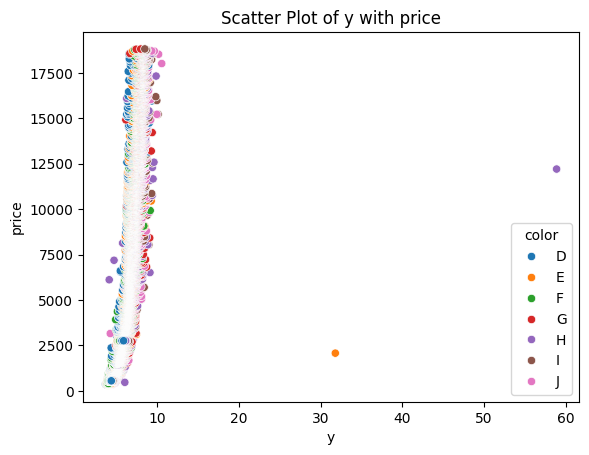

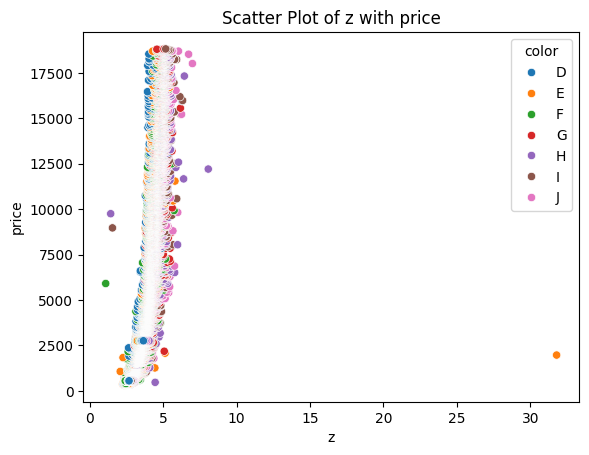

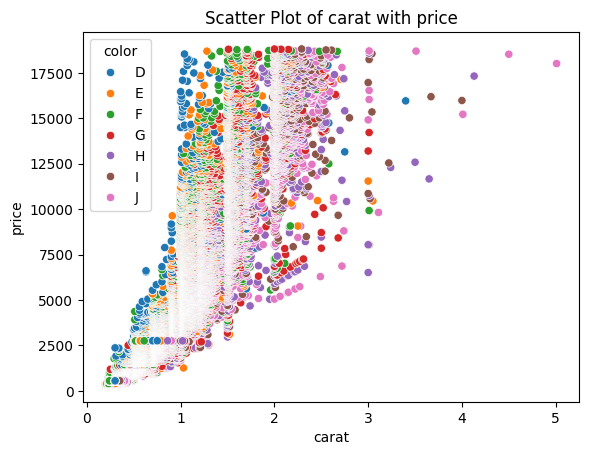

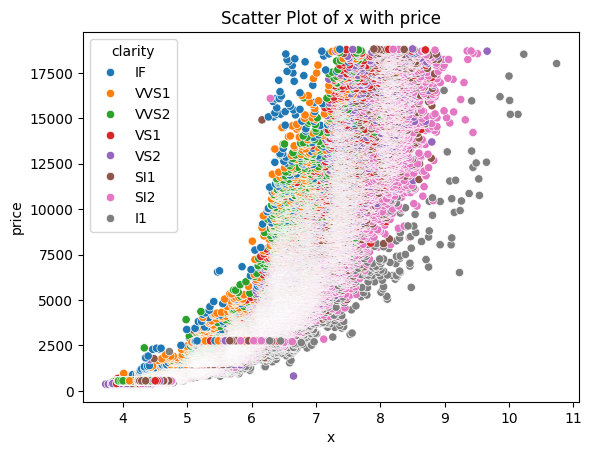

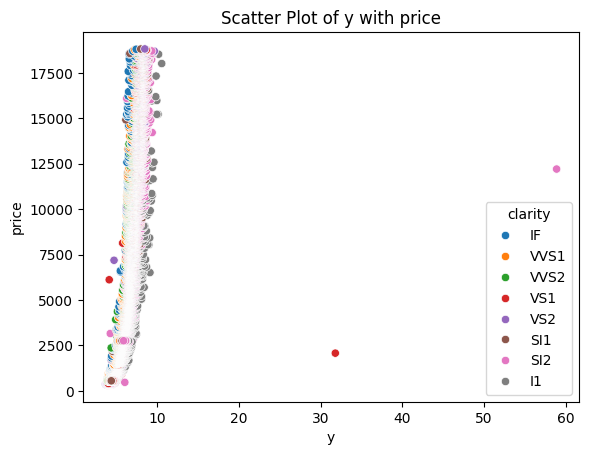

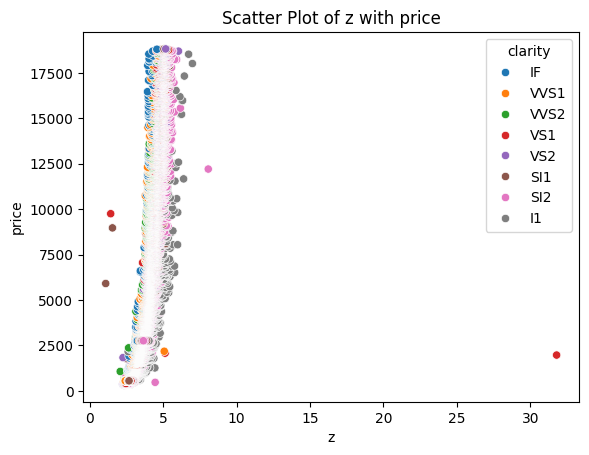

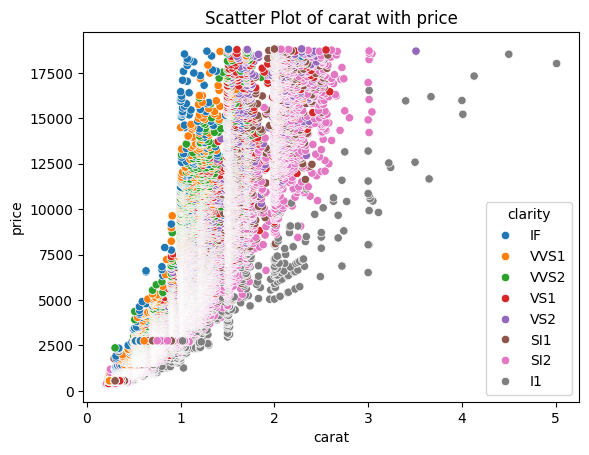

In [269]:
# scatter plot of highly correlated columns with price
cols=['x','y','z','carat']
for col in cols:
    sns.scatterplot(x=data[col],y=data['price'],hue=data['cut'])
    plt.title('Scatter Plot of {} with price'.format(col))
    plt.show()

for col in cols:
    sns.scatterplot(x=data[col],y=data['price'],hue=data['color'])
    plt.title('Scatter Plot of {} with price'.format(col))
    plt.show()

for col in cols:
    sns.scatterplot(x=data[col],y=data['price'],hue=data['clarity'])
    plt.title('Scatter Plot of {} with price'.format(col))
    plt.show()

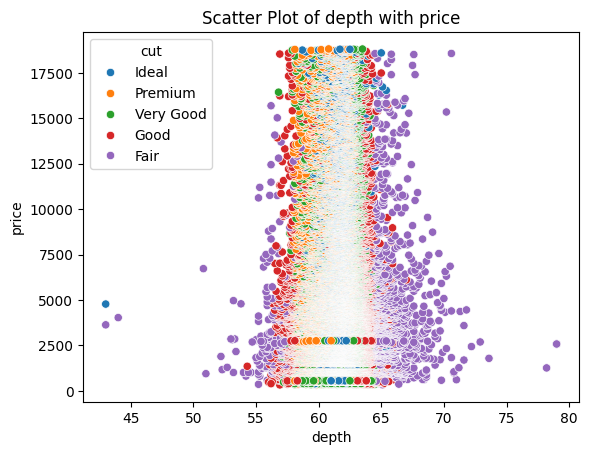

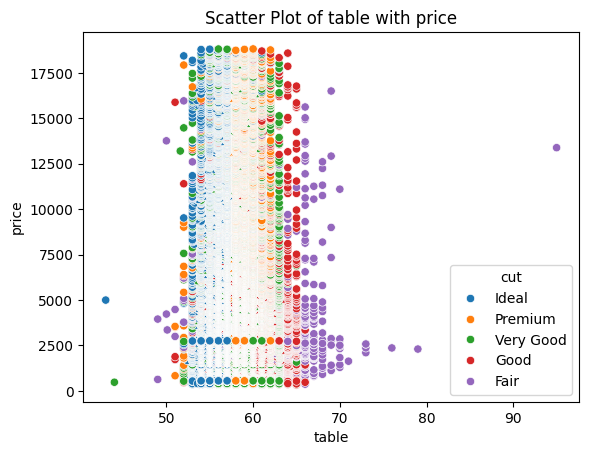

In [223]:
# scatter plot of weakly correlated columns with price 
cols=['depth','table']
for col in cols:
    sns.scatterplot(x=data[col],y=data['price'],hue=data['cut'])
    plt.title('Scatter Plot of {} with price'.format(col))
    plt.show()

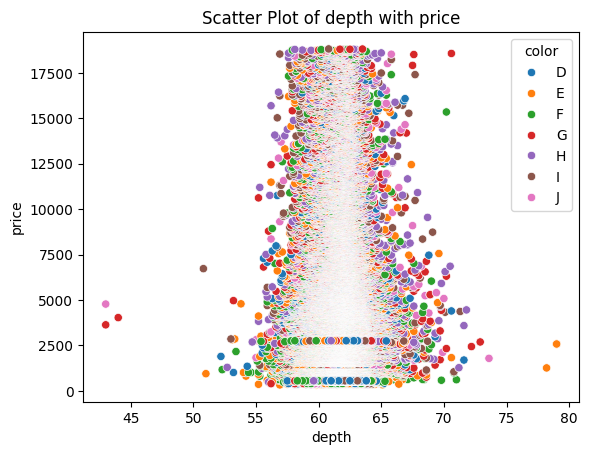

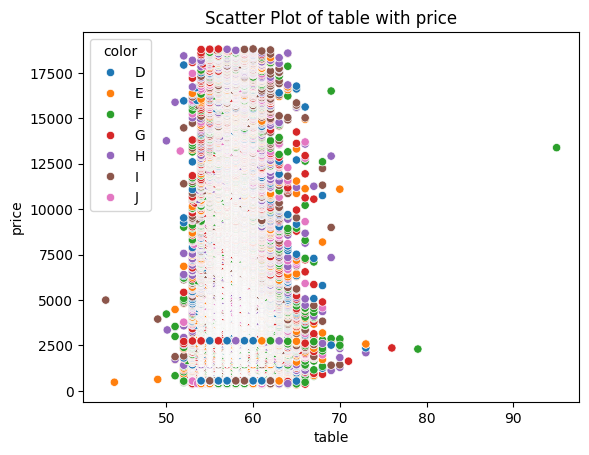

In [228]:
cols=['depth','table']
for col in cols:
    sns.scatterplot(x=data[col],y=data['price'],hue=data['color'])
    plt.title('Scatter Plot of {} with price'.format(col))
    plt.show()

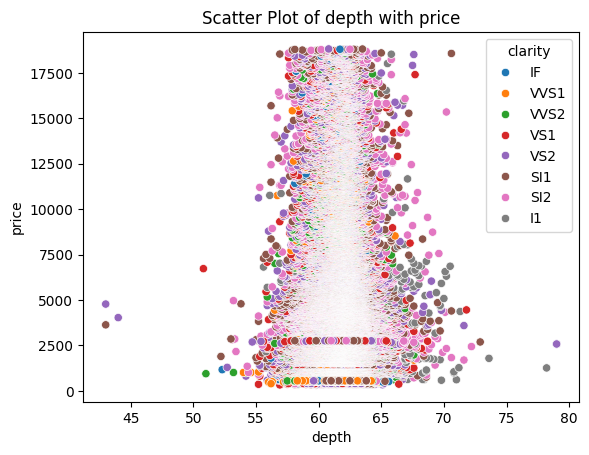

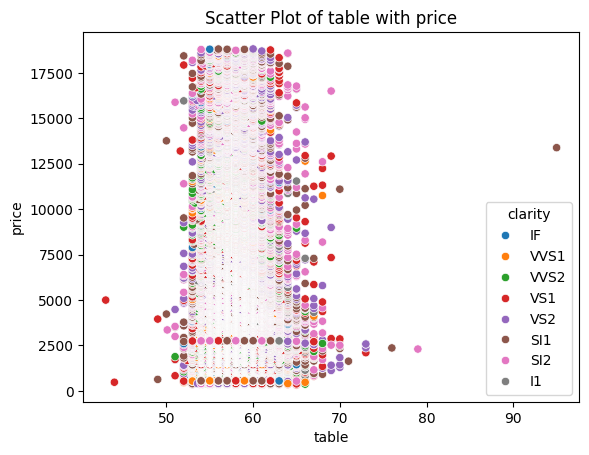

In [230]:
cols=['depth','table']
for col in cols:
    sns.scatterplot(x=data[col],y=data['price'],hue=data['clarity'])
    plt.title('Scatter Plot of {} with price'.format(col))
    plt.show()

### Observations:
 1. As we can see from the plots, price is increasing heavily with the strongly correlated features.
 2. In the case of weakly correlated features there is not much effect on price instead it depends more on other features suh as cut,color and clarity.
 3. The effect of correlated features on the price cannot be answered properly from these plots as well but it can be observed that the diamonds with the 'Fair' cut are generally with either too shallow or too deep proportions of depth and table compared to the optimal values.

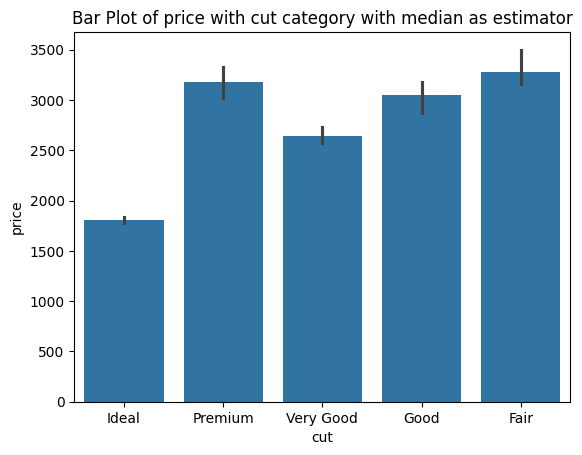

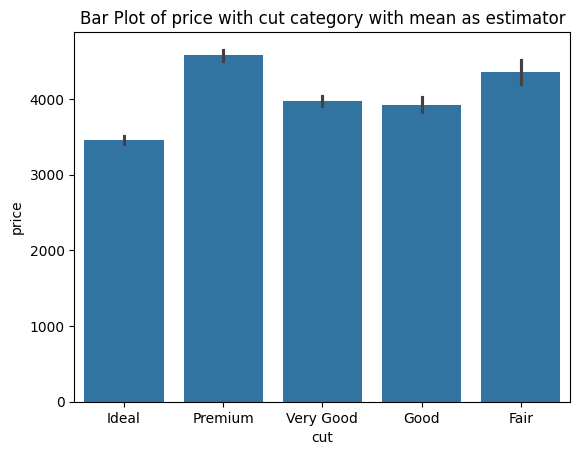

In [241]:
#barplot of price with 'cut' category
sns.barplot(x=data['cut'],y=data['price'],estimator='median')
plt.title('Bar Plot of price with cut category with median as estimator')
plt.show()
sns.barplot(x=data['cut'],y=data['price'],estimator='mean')
plt.title('Bar Plot of price with cut category with mean as estimator')
plt.show()

### Observations
It can be observed that the mean values are significantly higher than the median values which indicates the presence of high priced outliers, hence to analyze effect of a category on price, median is a better choice.

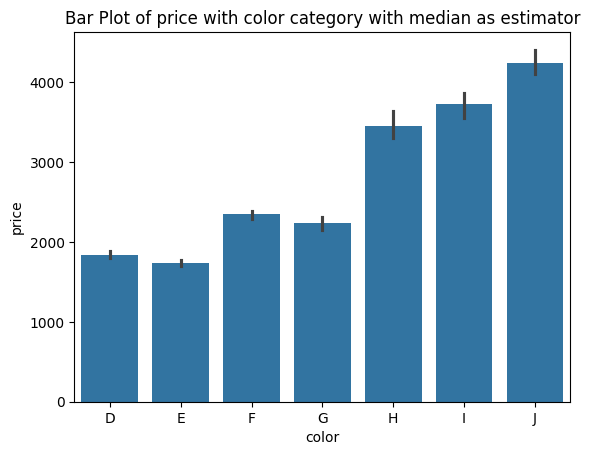

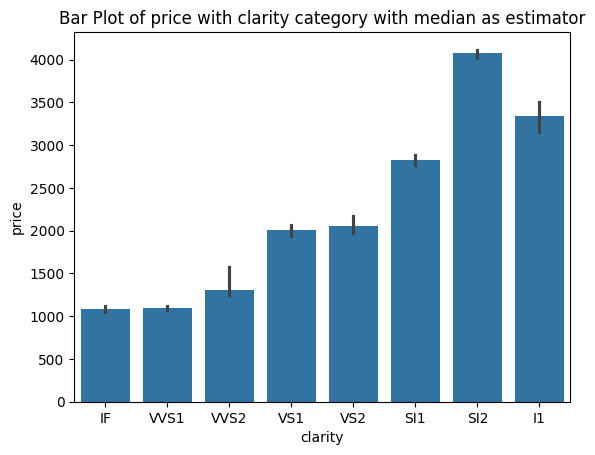

In [257]:
#barplot of price with 'color' category
sns.barplot(x=data['color'],y=data['price'],estimator='median')
plt.title('Bar Plot of price with color category with median as estimator')
plt.show()

#barplot of price with 'clarity' category
sns.barplot(x=data['clarity'],y=data['price'],estimator='median')
plt.title('Bar Plot of price with clarity category with median as estimator')
plt.show()

# Final Obervations:

1. Premium cut diamonds are generally most expensive.
2. Fair cut diamonds although they dont have the most optimal shape especially depth and table proportions but it is sacrificed for more shine and brilliance and so their price is also generally higher.
3. 'J' color category is generally most expensive and in clarity 'SI2' clarity is the most expensive.
4. Depth and Table proportions does not contribute in order to have a high demand diamond and they can be traded off for other features.
5. Carat Weight is the most important feature and a heavier diamond increases the price significantly even if other features such as color cut and clarity are same because it will be bigger in size because 'x','y' and 'z' are also strongly correlated with the carat weight.